In [8]:
#import our depencies 
# Import necessary libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import plotly.express as px

In [9]:
# Load the dataset
customer_segmentation_df = pd.read_csv('customer_segmentation_data.csv')
customer_segmentation_df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [10]:
# Check for missing values in each column
print(customer_segmentation_df.isna().sum())

id                      0
age                     0
gender                  0
income                  0
spending_score          0
membership_years        0
purchase_frequency      0
preferred_category      0
last_purchase_amount    0
dtype: int64


In [11]:
# Drop duplicate values
customer_segmentation_cleaned_df = customer_segmentation_df.drop_duplicates()
customer_segmentation_cleaned_df

,id,age,gender,income,spending_score,membership_years,purchase_frequency,preferred_category,last_purchase_amount
0,1,38,Female,99342,90,3,24,Groceries,113.53
1,2,21,Female,78852,60,2,42,Sports,41.93
2,3,60,Female,126573,30,2,28,Clothing,424.36
3,4,40,Other,47099,74,9,5,Home & Garden,991.93
4,5,65,Female,140621,21,3,25,Electronics,347.08
...,...,...,...,...,...,...,...,...,...
995,996,57,Male,112170,57,6,1,Clothing,313.64
996,997,23,Other,65337,76,10,23,Groceries,632.83
997,998,23,Male,113097,40,5,42,Sports,75.09
998,999,22,Female,113695,63,7,44,Electronics,505.16


In [12]:
from sklearn.preprocessing import StandardScaler

#Select our relevant features
features = customer_segmentation_cleaned_df[['age', 'income', 'spending_score', 'membership_years', 'purchase_frequency', 'last_purchase_amount']]

#Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)







#------------------------------------------LAST LEFT ON -----------------------------------------------------------------------------------------------------------

In [13]:
#CHAT GPT TEST CODE TO FIX CLUSTERING 
import pandas as pd

# Assume customer_segmentation_cleaned_df is your DataFrame
# Features you want to check for outliers
features = ['age', 'income', 'spending_score', 'purchase_frequency', 'membership_years']

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = customer_segmentation_cleaned_df[features].quantile(0.25)
Q3 = customer_segmentation_cleaned_df[features].quantile(0.75)

# Step 2: Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Remove outliers
filtered_data = customer_segmentation_cleaned_df[~((customer_segmentation_cleaned_df[features] < lower_bound) | 
                                                   (customer_segmentation_cleaned_df[features] > upper_bound)).any(axis=1)]

# Now `filtered_data` contains the data with outliers removed.


In [14]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(numeric_data)

# Or use t-SNE for better visualization
tsne = TSNE(n_components=3, perplexity=30)
tsne_result = tsne.fit_transform(numeric_data)

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()





NameError: name 'numeric_data' is not defined

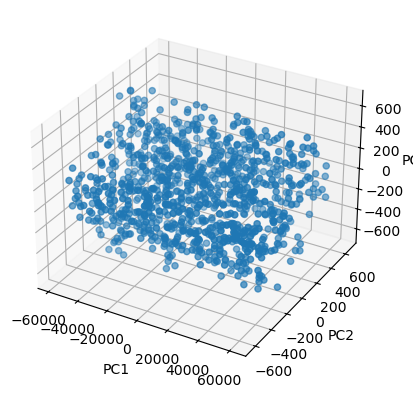

In [15]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

# Assuming customer_segmentation_cleaned_df is your DataFrame
# Features you want to check for outliers
features = ['age', 'income', 'spending_score', 'purchase_frequency', 'membership_years']

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = customer_segmentation_cleaned_df[features].quantile(0.25)
Q3 = customer_segmentation_cleaned_df[features].quantile(0.75)

# Step 2: Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Remove outliers
filtered_data = customer_segmentation_cleaned_df[~((customer_segmentation_cleaned_df[features] < lower_bound) | 
                                                   (customer_segmentation_cleaned_df[features] > upper_bound)).any(axis=1)]

# Encode categorical variables (if any)
filtered_data = pd.get_dummies(filtered_data)

# Select only numeric columns
numeric_data = filtered_data.select_dtypes(include=[float, int])

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(numeric_data)

# Or use t-SNE for better visualization
tsne = TSNE(n_components=3, perplexity=30)
tsne_result = tsne.fit_transform(numeric_data)

# Plotting the results
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(pca_result[:, 0], pca_result[:, 1], pca_result[:, 2])
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()


C:\Users\Rich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


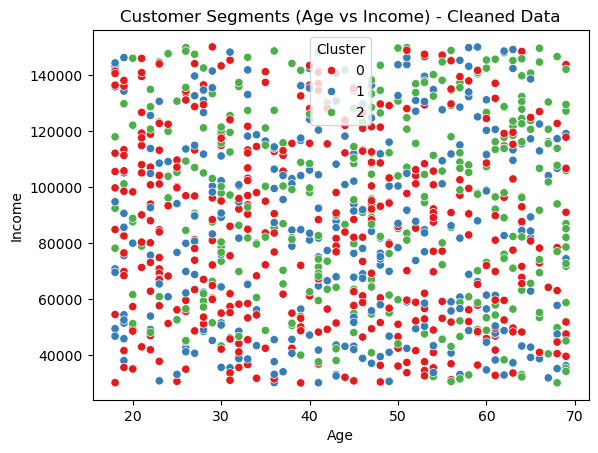

In [16]:
#CHAT GPT TEST CODE TO FIX CLUSTERING 

# Step 1: Select relevant columns for clustering (after removing outliers)
features = ['age', 'income', 'spending_score', 'purchase_frequency', 'membership_years']
X = filtered_data[features]

# Step 2: Standardize the data (important for clustering)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Step 3: Apply K-Means Clustering (with your chosen number of clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
filtered_data['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Visualize the clusters again
sns.scatterplot(x=filtered_data['age'],
                y=filtered_data['income'],
                hue=filtered_data['Cluster'],
                palette='Set1')
plt.title('Customer Segments (Age vs Income) - Cleaned Data')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()


In [17]:
#CHAT GPT TEST CODE TO FIX CLUSTERING 

# Group the data by the cluster assignment and calculate mean values of the features
cluster_profile = filtered_data.groupby('Cluster')[features].mean()
print(cluster_profile)


               age        income  spending_score  purchase_frequency  \
Cluster                                                                
0        41.219839  84541.991957       21.378016           27.471850   
1        43.270627  85977.858086       70.798680           30.867987   
2        47.212963  95417.734568       65.614198           21.592593   

         membership_years  
Cluster                    
0                5.439678  
1                8.125413  
2                3.018519  


In [18]:
#CHAT GPT TEST CODE TO FIX CLUSTERING 

features = ['age', 'income', 'spending_score', 'purchase_frequency', 'membership_years']
X = filtered_data[features]

C:\Users\Rich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Rich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Rich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(
C:\Users\Rich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows wi

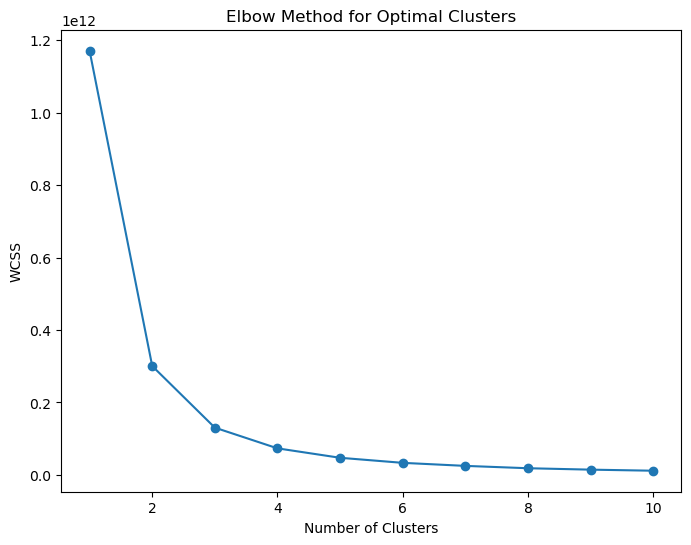

In [19]:
#Elbow method to help determine the number of clusters to use
wcss = []
for i in range(1,11): # From 1 cluster to 10 clusters
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot our figure
plt.figure(figsize=(8,6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

C:\Users\Rich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


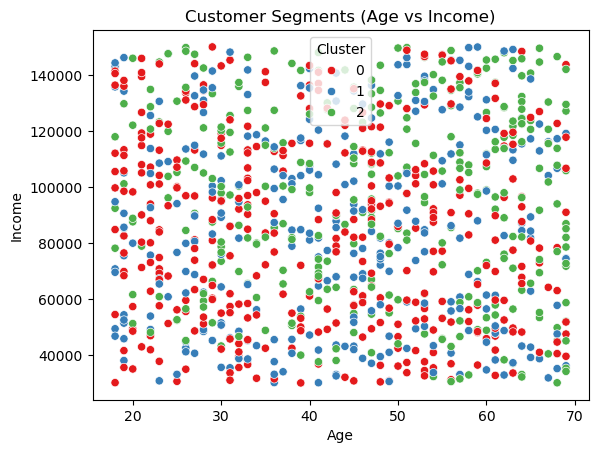

In [20]:
# Question 1: What are the key segments within the customer base?

# Step 1: Select relevant columns for clustering
# We are using 'age', 'income', and 'spending_score' for clustering.
# This assumes customer_segmentation_df is already loaded.
features = ['age', 'income', 'spending_score', 'purchase_frequency', 'membership_years']
X = customer_segmentation_df[features]

# Step 2: Normalize the data (Standardization)
# We will use StandardScaler to scale the data.
scaler = StandardScaler()
scaled_data = scaler.fit_transform(X)

# Step 3: Apply K-Means Clustering
# Choose the number of clusters (n_clusters). We'll use 5 clusters here.
kmeans = KMeans(n_clusters=3, random_state=42)
customer_segmentation_df['Cluster'] = kmeans.fit_predict(scaled_data)

# Step 4: Visualize the clusters
# Visualizing the clusters based on 'age' and 'income'. 
# 'hue' parameter is used to color the points according to their cluster assignment.
sns.scatterplot(x=customer_segmentation_df['age'],
                y=customer_segmentation_df['income'],
                hue=customer_segmentation_df['Cluster'],
                palette='Set1')
plt.title('Customer Segments (Age vs Income)')
plt.xlabel('Age')
plt.ylabel('Income')
plt.legend(title='Cluster')
plt.show()

In [21]:
# Group the data by the cluster assignment and calculate mean values of the features
cluster_profile = customer_segmentation_df.groupby('Cluster')[features].mean()
cluster_profile

,age,income,spending_score,purchase_frequency,membership_years
Cluster,,,,,
0,41.219839,84541.991957,21.378016,27.471850,5.439678
1,43.270627,85977.858086,70.798680,30.867987,8.125413
2,47.212963,95417.734568,65.614198,21.592593,3.018519


In [22]:
# See a few rows of the customer data with cluster labels
customer_segmentation_cleaned_df[['age', 'income', 'spending_score', 'purchase_frequency', 'membership_years', 'Cluster']].head()

KeyError: "['Cluster'] not in index"

In [ ]:
# Add our plot
fig = plt.figure(figsize=(10, 8))
# Include our subplot
ax = fig.add_subplot(111, projection='3d')

# Plot our data (Age, Income, Spending Score)
scatter = ax.scatter(customer_segmentation_df['age'],
                     customer_segmentation_df['income'],
                     customer_segmentation_df['spending_score'],
                     c=filtered_data['Cluster'], cmap='viridis')

# Set labels and titles
ax.set_xlabel('Age')
ax.set_ylabel('Income')
ax.set_zlabel('Spending Score')
plt.title('Customer Segments (3D View)')

# Add colorbar to show the range of clusters
cbar = plt.colorbar(scatter)
cbar.set_label('Cluster')

# Show the plot
plt.show()




In [ ]:
from sklearn.decomposition import PCA

# Perform PCA to reduce to 2 components (you could try 3 as well)
pca = PCA(n_components=3)
pca_data = pca.fit_transform(scaled_data)

# Add PCA components to your dataframe for visualization
customer_segmentation_cleaned_df['PCA1'] = pca_data[:, 0]
customer_segmentation_cleaned_df['PCA2'] = pca_data[:, 1]
customer_segmentation_cleaned_df['P']


# Plot the clusters in 2D (PCA1 vs PCA2)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=customer_segmentation_cleaned_df, palette='Set1')
plt.title('Customer Segments (2D PCA View)')
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=5)
customer_segmentation_cleaned_df['Cluster_DBSCAN'] = dbscan.fit_predict(scaled_data)

# Visualize the clusters (in 2D or 3D)
plt.figure(figsize=(10, 8))
sns.scatterplot(x='age', y='income', hue='Cluster_DBSCAN', data=customer_segmentation_cleaned_df, palette='Set1')
plt.title('Customer Segments (DBSCAN Clustering)')
plt.show()


In [ ]:
#Barplot
cluster_profile = customer_segmentation_cleaned_df.groupby('Cluster')[features].mean()

# Bar plot
cluster_profile.plot(kind='bar', figsize=(10,6))

plt.xlabel('Cluster')
plt.ylabel('Mean Value')
plt.title('Cluster Profile: Mean Age, Income, and Spending Score by Cluster')
plt.legend(title='Features', labels=['Age', 'Income', 'Spending Score'])
plt.xticks(rotation=0)
plt.show()

C:\Users\Rich\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.
  warnings.warn(


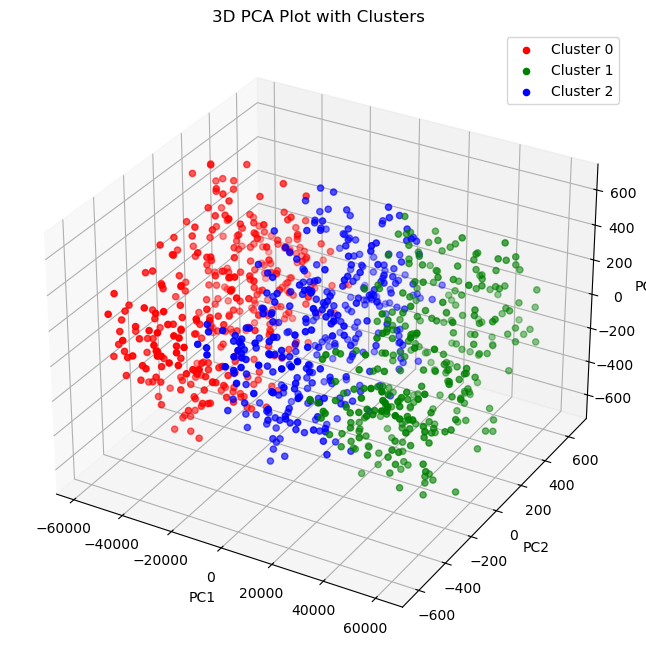

In [24]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Assuming customer_segmentation_cleaned_df is your DataFrame
# Features you want to check for outliers
features = ['age', 'income', 'spending_score', 'purchase_frequency', 'membership_years']

# Step 1: Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = customer_segmentation_cleaned_df[features].quantile(0.25)
Q3 = customer_segmentation_cleaned_df[features].quantile(0.75)

# Step 2: Calculate IQR (Interquartile Range)
IQR = Q3 - Q1

# Step 3: Define the bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 4: Remove outliers
filtered_data = customer_segmentation_cleaned_df[~((customer_segmentation_cleaned_df[features] < lower_bound) | 
                                                   (customer_segmentation_cleaned_df[features] > upper_bound)).any(axis=1)]

# Encode categorical variables (if any)
filtered_data = pd.get_dummies(filtered_data)

# Select only numeric columns
numeric_data = filtered_data.select_dtypes(include=[float, int])

# Apply PCA
pca = PCA(n_components=3)
pca_result = pca.fit_transform(numeric_data)

# Perform KMeans clustering
n_clusters = 3  # Number of clusters
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
clusters = kmeans.fit_predict(numeric_data)

# Add cluster labels to the DataFrame
filtered_data['cluster'] = clusters

# Plotting the results with 3 colors
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Assign colors based on the cluster
colors = ['r', 'g', 'b']  # Red, Green, Blue
for i in range(n_clusters):
    ax.scatter(pca_result[filtered_data['cluster'] == i, 0],  # PC1
               pca_result[filtered_data['cluster'] == i, 1],  # PC2
               pca_result[filtered_data['cluster'] == i, 2],  # PC3
               c=colors[i], label=f'Cluster {i}')

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('3D PCA Plot with Clusters')
plt.legend()
plt.show()

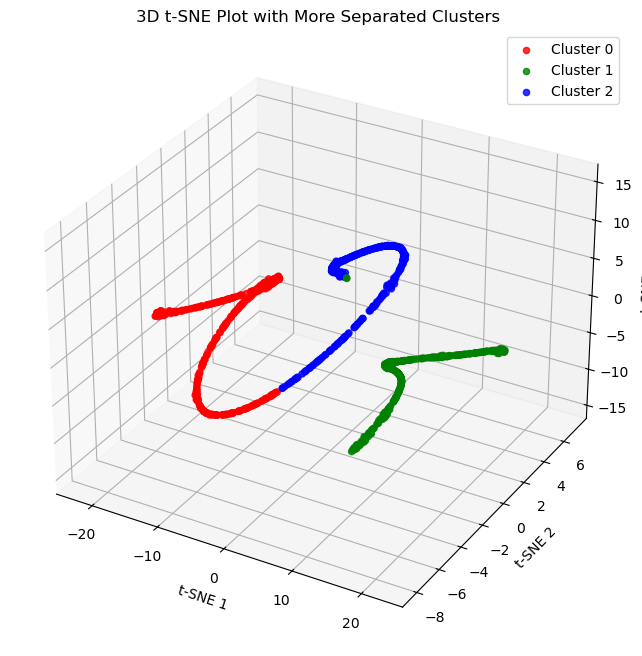

In [25]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import numpy as np

# Apply t-SNE with increased spacing
tsne = TSNE(n_components=3, perplexity=40, learning_rate=100, early_exaggeration=25, random_state=42)
tsne_result = tsne.fit_transform(numeric_data)

# 3D t-SNE Scatter Plot
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for i in range(n_clusters):
    mask = filtered_data['cluster'] == i
    ax.scatter(tsne_result[mask, 0],  # t-SNE 1
               tsne_result[mask, 1],  # t-SNE 2
               tsne_result[mask, 2],  # t-SNE 3
               c=colors[i], label=f'Cluster {i}', alpha=0.8)

ax.set_xlabel('t-SNE 1')
ax.set_ylabel('t-SNE 2')
ax.set_zlabel('t-SNE 3')
ax.set_title('3D t-SNE Plot with More Separated Clusters')
plt.legend()
plt.show()
